# 1. HIERARCHICAL CLUSTERING
---

## 1.1. DATA PREPROCESSING

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [49]:
data_ = pd.read_csv("creditcard.csv")

In [50]:
data_

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [51]:
data_.isnull().sum().sum()

0

In [52]:
data_ = data_.iloc[0: 999, 1: 11]

In [53]:
data_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074
...,...,...,...,...,...,...,...,...,...,...
994,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,0.015465
995,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,-1.681537
996,-2.101171,-0.227365,1.624668,-0.291123,1.902446,-1.483921,-0.275117,0.085964,-0.563098,-0.376024
997,-1.248163,0.315246,3.708935,0.687280,-0.873071,1.091287,0.297707,-0.633135,1.102317,2.536557


In [54]:
data_ = data_.values

----

## 1.2. DEFINE "N_CLUSTERS" VALUE
----
### It is choosen the most evident point at graphic.

In [55]:
from sklearn.cluster import KMeans

In [56]:
result = []

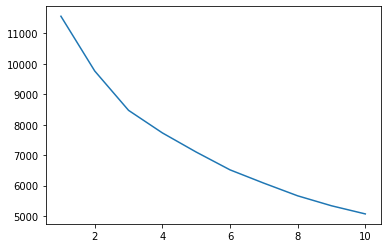

In [57]:
for i in range(1, 11):

    k_means = KMeans(n_clusters=i, init="k-means++", random_state=0)
    k_means.fit(data_)
    result.append(k_means.inertia_)

plt.plot(range(1, 11), result)
plt.show()

------

## 1.3. HIERARCHICAL CLUSTERING ALGORITHM

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [60]:
y_pred = ac.fit_predict(data_)

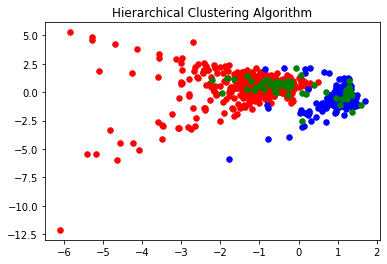

In [61]:
plt.scatter(data_[y_pred == 0,0], data_[y_pred == 0,1], s = 30, c = 'red')
plt.scatter(data_[y_pred == 1,0], data_[y_pred == 1,1], s = 30, c = 'blue')
plt.scatter(data_[y_pred == 2,0], data_[y_pred == 2,1], s = 30, c = 'green')

plt.title("Hierarchical Clustering Algorithm")
plt.show()

In [62]:
import scipy.cluster.hierarchy as hsc

In [ ]:
dendogram = hsc.dendrogram(hsc.linkage(data_, method="ward"))
plt.show()